<a href="https://colab.research.google.com/github/SaiKarthik9063/parallelized-inflation-rate-prediction-using-deep-learning/blob/main/Copy_of_US_parallel_1_I_R_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
# Upload the file
uploaded = files.upload()
# Get the first uploaded file
file_name = list(uploaded.keys())[0]
# Read the Excel file
df = pd.read_excel(file_name)
infUS = df.iloc[70:370, 2].astype(float).tolist()

Saving US_Infl.xlsx to US_Infl (1).xlsx


In [ ]:
# Upload the file
uploaded = files.upload()

# Get the first uploaded file
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)
OutputGapUS = df.iloc[70:370, 4].astype(float).tolist()

Saving US_output_gap_proxy_Industrial_Activity.xlsx to US_output_gap_proxy_Industrial_Activity (1).xlsx


In [ ]:
uploaded = files.upload()

# Get the first uploaded file
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)
intrateUS = df.iloc[64:364, 1].astype(float).tolist()

# Divide by 100
intrateUS = [rate / 100 for rate in intrateUS]

Saving US_interest_rate.xlsx to US_interest_rate (1).xlsx


In [ ]:
uploaded = files.upload()

# Get the first uploaded file
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)
M2US = df.iloc[66:366, 9].astype(float).tolist()

Saving US_M2.xlsx to US_M2 (1).xlsx


In [ ]:
uploaded = files.upload()

# Get the first uploaded file
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)
urateUS = df.iloc[70:370, 1].astype(float).tolist()

# Divide by 100
urateUS = [rate / 100 for rate in urateUS]

Saving US_u_rate.xls to US_u_rate (1).xls


In [ ]:
uploaded = files.upload()

# Get the first uploaded file
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)
RERUS = pd.to_numeric(df.iloc[22:322, 2], errors='coerce').tolist()

Saving US_RER.xlsx to US_RER (1).xlsx


In [ ]:
uploaded = files.upload()

# Get the first uploaded file
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)
nomWUS = df.iloc[70:370, 2].astype(float).tolist()

Saving US_nom_wages.xlsx to US_nom_wages (1).xlsx


In [ ]:
realWUS = [n - i for n, i in zip(nomWUS, infUS)]

In [ ]:
print(len(infUS))
print(len(OutputGapUS))
print(len(intrateUS))
print(len(M2US))
print(len(urateUS))
print(len(RERUS))
print(len(nomWUS))

300
300
300
300
300
300
300


In [ ]:
import pandas as pd
from datetime import datetime, timedelta

# Define the number of months
nmonths = 300
start_date = pd.to_datetime('1995-01-01')

mdate = pd.date_range(start=start_date, periods=nmonths, freq='MS')

# Replace missing values with 0
infUS = [0 if pd.isna(value) else value for value in infUS]
intrateUS = [0 if pd.isna(value) else value for value in intrateUS]
M2US = [0 if pd.isna(value) else value for value in M2US]
OutputGapUS = [0 if pd.isna(value) else value for value in OutputGapUS]
urateUS = [0 if pd.isna(value) else value for value in urateUS]
RERUS = [0 if pd.isna(value) else value for value in RERUS]
realWUS = [0 if pd.isna(value) else value for value in realWUS]

# Create the DataFrame
dataUS = pd.DataFrame({
    'mdate': mdate,
    'infUS': infUS,
    'intrateUS': intrateUS,
    'M2US': M2US,
    'OutputGapUS': OutputGapUS,
    'urateUS': urateUS,
    'RERUS': RERUS,
    'realWUS': realWUS
})
dataUS.to_csv('\content\downloads\dataUS.csv', index=False)

new_row = {'mdate': '2020-01-01', 'infUS': 0.023456, 'intrateUS': 0.012345, 'M2US': 0.034567, 'OutputGapUS': 0.045678, 'urateUS': 0.056789, 'RERUS': 0.067890, 'realWUS': 0.078901}
dataUS = dataUS.append(new_row, ignore_index=True)
dataUS['mdate'] = pd.to_datetime(dataUS['mdate'])

# Display the DataFrame
print(dataUS)

         mdate     infUS  intrateUS      M2US  OutputGapUS   urateUS  \
0   1995-01-01  0.029126   0.029600 -0.004152     0.016030  0.056000   
1   1995-02-01  0.029716   0.030500 -0.005056     0.009197  0.054000   
2   1995-03-01  0.029620   0.032500 -0.004879     0.005815  0.054000   
3   1995-04-01  0.031511   0.033400 -0.002951     0.000972  0.058000   
4   1995-05-01  0.030789   0.035600  0.002985     0.000249  0.056000   
..         ...       ...        ...       ...          ...       ...   
296 2019-09-01  0.023495   0.019100  0.006181    -0.009882  0.035000   
297 2019-10-01  0.023143   0.019500  0.009724    -0.014100  0.036000   
298 2019-11-01  0.023173   0.021900  0.011241    -0.005827  0.035000   
299 2019-12-01  0.022486   0.022000  0.009856    -0.010403  0.035000   
300 2020-01-01  0.023456   0.012345  0.034567     0.045678  0.056789   

        RERUS   realWUS  
0    0.000000 -0.004126  
1    0.000000 -0.004827  
2    0.000000 -0.002953  
3    0.000000 -0.005779  
4    

<ipython-input-14-968c51d2181d>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataUS = dataUS.append(new_row, ignore_index=True)


In [ ]:
import pandas as pd #data manipulation
import numpy as np #data manipulation
from numpy import array
from numpy import hstack
from numpy.random import seed
seed(123)
import tensorflow as tf
import datetime
from datetime import datetime, timedelta
from sklearn import preprocessing #preprocessing
import math as math

import keras as keras #keras package for neural networks
from keras.models import Sequential
from keras.layers import Dense #dense layers
from keras.layers import LSTM #LSTM layers
from keras.layers import Dropout #Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping
import pydot as pyd
from IPython.display import SVG
from keras.utils.vis_utils import plot_model #plot network's structure
import matplotlib.pyplot as plt #plots
import time
from collections import Counter
import os
os.chdir('..')
import csv #save output
import math

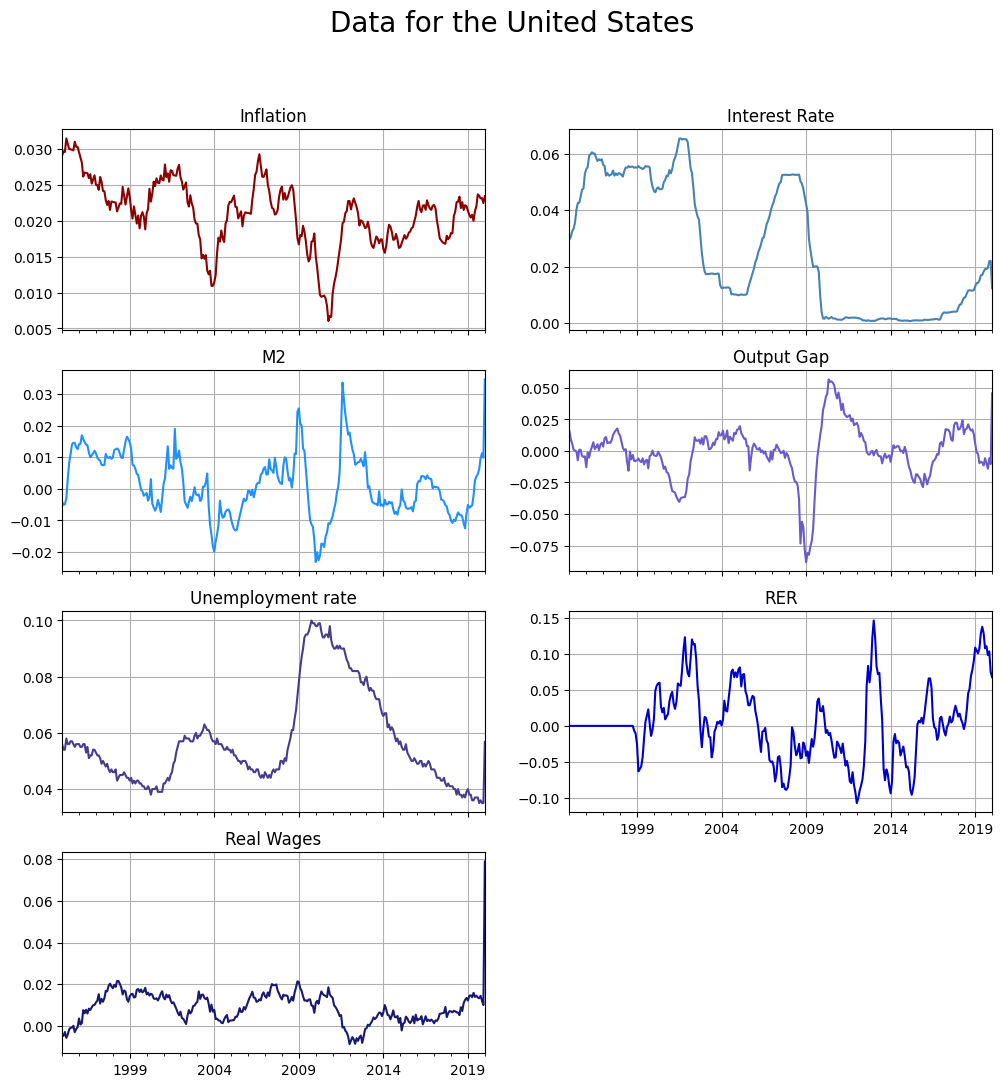

In [ ]:
dataUS.plot(x='mdate',
            y=['infUS', 'intrateUS', 'M2US', 'OutputGapUS', 'urateUS', 'RERUS', 'realWUS'],
            kind='line',
            subplots=True,
            grid=True,
            figsize=(12, 12),
            title=['Inflation', 'Interest Rate', 'M2', 'Output Gap', 'Unemployment rate', 'RER', 'Real Wages'],
            layout=(4, 2),
            sharex=True,
            sharey=False,
            legend=False,
            style=['darkred', 'steelblue', 'dodgerblue', 'slateblue', 'darkslateblue', 'mediumblue', 'midnightblue'])

[ax.set_xlabel('') for ax in plt.gcf().axes]
plt.suptitle('Data for the United States', fontsize=20)
plt.show()



In [ ]:
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        #find end of pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1

        #check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break

        #gather input and output
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix - 1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)

    return array(X), array(y)

In [ ]:
selected_columns = ['mdate', 'infUS']  # Specify the columns you want to display

start_date = '2019-02-01'
end_date = '2020-02-01'
dataUS.loc[(dataUS['mdate'] >= start_date) & (dataUS['mdate'] <= end_date), selected_columns]





,mdate,infUS
289,2019-02-01,0.020848
290,2019-03-01,0.020471
291,2019-04-01,0.020851
292,2019-05-01,0.020003
293,2019-06-01,0.021377
294,2019-07-01,0.022043
295,2019-08-01,0.023696
296,2019-09-01,0.023495
297,2019-10-01,0.023143
298,2019-11-01,0.023173


In [ ]:
selected_columns = ['mdate', 'infUS']  # Specify the columns you want to display

start_date = '1995-01-01'
end_date = '2019-01-01'
dataUS.loc[(dataUS['mdate'] >= start_date) & (dataUS['mdate'] <= end_date), selected_columns]


,mdate,infUS
0,1995-01-01,0.029126
1,1995-02-01,0.029716
2,1995-03-01,0.029620
3,1995-04-01,0.031511
4,1995-05-01,0.030789
...,...,...
284,2018-09-01,0.022611
285,2018-10-01,0.021532
286,2018-11-01,0.022190
287,2018-12-01,0.022038


In [ ]:
start_date = '1995-01-01'
end_date = '2015-01-01'
selected_columns = ['infUS']  # Specify the columns you want to display
in_inf=array(dataUS.loc[(dataUS['mdate'] >= start_date) & (dataUS['mdate'] <= end_date), selected_columns])

selected_columns = ['intrateUS']  # Specify the columns you want to display
in_int=array(dataUS.loc[(dataUS['mdate'] >= start_date) & (dataUS['mdate'] <= end_date), selected_columns])

selected_columns = ['M2US']  # Specify the columns you want to display
in_M2=array(dataUS.loc[(dataUS['mdate'] >= start_date) & (dataUS['mdate'] <= end_date), selected_columns])

selected_columns = ['OutputGapUS']  # Specify the columns you want to display
in_gdp=array(dataUS.loc[(dataUS['mdate'] >= start_date) & (dataUS['mdate'] <= end_date), selected_columns])

selected_columns = ['urateUS']  # Specify the columns you want to display
in_u=array(dataUS.loc[(dataUS['mdate'] >= start_date) & (dataUS['mdate'] <= end_date), selected_columns])

selected_columns = ['RERUS']  # Specify the columns you want to display
in_rer=array(dataUS.loc[(dataUS['mdate'] >= start_date) & (dataUS['mdate'] <= end_date), selected_columns])

selected_columns = ['realWUS']  # Specify the columns you want to display
in_rw=array(dataUS.loc[(dataUS['mdate'] >= start_date) & (dataUS['mdate'] <= end_date), selected_columns])





In [ ]:

start_date = '2015-01-01'
end_date = '2019-01-01'
selected_columns = ['infUS']
valin_inf = array(dataUS.loc[(dataUS['mdate'] >= start_date) & (dataUS['mdate'] <= end_date), selected_columns])
selected_columns = ['intrateUS']
valin_int = array(dataUS.loc[(dataUS['mdate'] >= start_date) & (dataUS['mdate'] <= end_date), selected_columns])
selected_columns = ['M2US']
valin_M2  = array(dataUS.loc[(dataUS['mdate'] >= start_date) & (dataUS['mdate'] <= end_date), selected_columns])
selected_columns = ['OutputGapUS']
valin_gdp = array(dataUS.loc[(dataUS['mdate'] >= start_date) & (dataUS['mdate'] <= end_date), selected_columns])
selected_columns = ['urateUS']
valin_u   = array(dataUS.loc[(dataUS['mdate'] >= start_date) & (dataUS['mdate'] <= end_date), selected_columns])
selected_columns = ['RERUS']
valin_rer = array(dataUS.loc[(dataUS['mdate'] >= start_date) & (dataUS['mdate'] <= end_date), selected_columns])
selected_columns = ['realWUS']
valin_rw  = array(dataUS.loc[(dataUS['mdate'] >= start_date) & (dataUS['mdate'] <= end_date), selected_columns])

In [ ]:
start_date = '1995-01-01'
end_date = '2015-01-01'
selected_columns = ['infUS']
out_inf = array(dataUS.loc[(dataUS['mdate'] >= start_date) & (dataUS['mdate'] <= end_date), selected_columns] )

In [ ]:
start_date = '2015-01-01'
end_date = '2019-01-01'
selected_columns = ['infUS']
valout_inf=array(dataUS.loc[(dataUS['mdate'] >= start_date) & (dataUS['mdate'] <= end_date), selected_columns] )

In [ ]:
# Reshape the input and output arrays
in_inf = in_inf.reshape((len(in_inf), 1))
in_int = in_int.reshape((len(in_int), 1))
in_M2 = in_M2.reshape((len(in_M2), 1))
in_gdp = in_gdp.reshape((len(in_gdp), 1))
in_u = in_u.reshape((len(in_u), 1))
in_rer = in_rer.reshape((len(in_rer), 1))
in_rw = in_rw.reshape((len(in_rw), 1))

valin_inf = valin_inf.reshape((len(valin_inf), 1))
valin_int = valin_int.reshape((len(valin_int), 1))
valin_M2 = valin_M2.reshape((len(valin_M2), 1))
valin_gdp = valin_gdp.reshape((len(valin_gdp), 1))
valin_u = valin_u.reshape((len(valin_u), 1))
valin_rer = valin_rer.reshape((len(valin_rer), 1))
valin_rw = valin_rw.reshape((len(valin_rw), 1))

out_inf = out_inf.reshape((len(out_inf), 1))
valout_inf = valout_inf.reshape((len(valout_inf), 1))

# Stack columns horizontally
dataset = hstack((in_inf, in_int, in_M2, in_gdp, in_u, in_rer, in_rw, out_inf))
valset = hstack((valin_inf, valin_int, valin_M2, valin_gdp, valin_u, valin_rer, valin_rw, valout_inf))

# Timesteps
n_steps_in, n_steps_out = 12, 12  # use 12 observations to predict next 12

X, y = split_sequences(dataset, n_steps_in, n_steps_out)
print(X.shape, y.shape)  # shape of input and output = (227, 12, 7) and (227, 12)
valX, valy = split_sequences(valset, n_steps_in, n_steps_out)
print(valX.shape, valy.shape)  # shape of validation input and output = (48, 12, 7) and (48, 12)



(219, 12, 7) (219, 12)
(27, 12, 7) (27, 12)


In [ ]:

start_date = '2018-02-01'
end_date = '2019-01-01'
selected_columns = ['infUS']
x_inf = array(dataUS.loc[(dataUS['mdate'] >= start_date) & (dataUS['mdate'] <= end_date), selected_columns])
selected_columns = ['intrateUS']
x_int= array(dataUS.loc[(dataUS['mdate'] >= start_date) & (dataUS['mdate'] <= end_date), selected_columns])
selected_columns = ['M2US']
x_M2  = array(dataUS.loc[(dataUS['mdate'] >= start_date) & (dataUS['mdate'] <= end_date), selected_columns])
selected_columns = ['OutputGapUS']
x_gdp = array(dataUS.loc[(dataUS['mdate'] >= start_date) & (dataUS['mdate'] <= end_date), selected_columns])
selected_columns = ['urateUS']
x_u   = array(dataUS.loc[(dataUS['mdate'] >= start_date) & (dataUS['mdate'] <= end_date), selected_columns])
selected_columns = ['RERUS']
x_rer = array(dataUS.loc[(dataUS['mdate'] >= start_date) & (dataUS['mdate'] <= end_date), selected_columns])
selected_columns = ['realWUS']
x_rw  = array(dataUS.loc[(dataUS['mdate'] >= start_date) & (dataUS['mdate'] <= end_date), selected_columns])


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense



In [ ]:
n_features = X.shape[2]
n_steps_in = 12  # Define the number of input time steps
n_steps_out = 12

#model

model = Sequential()
model.add(LSTM(100,
               activation = 'tanh',
               return_sequences = True,
               input_shape = (n_steps_in, n_features)))
model.add(LSTM(100,
               dropout = 0.4,
               recurrent_dropout = 0.4,
              activation = 'tanh'))
model.add(Dense(50, activation = 'tanh'))
model.add(Dense(25, activation = 'tanh'))
model.add(Dense(n_steps_out))

#compile model

model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
              loss = 'mse')


strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
    parallel_model = model


es = EarlyStopping(monitor = 'val_loss',
                  mode = 'min',
                  min_delta = 0.01,
                  patience = 30,
                  verbose = 0)

#fit

fit = parallel_model.fit(X,
          y,
          validation_data = (valX, valy),
          epochs = 500,
          verbose = 0,
          callbacks = [es])



#prediction
x_input = array([x_inf,
                 x_int,
                 x_M2,
                 x_gdp,
                 x_u,
                 x_rer,
                 x_rw])
x_input = x_input.reshape((1, n_steps_in, n_features))

yhat = parallel_model.predict(x_input, verbose = 0)
print(yhat)

[[0.02034709 0.02377254 0.02433298 0.01982796 0.02595302 0.0232068
  0.02651963 0.02456904 0.02464046 0.02259317 0.02020168 0.02272478]]


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           43200     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 50)                5050      
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 12)                312       
                                                                 
Total params: 130,237
Trainable params: 130,237
Non-trainable params: 0
_________________________________________________________________
None


<function matplotlib.pyplot.show(close=None, block=None)>

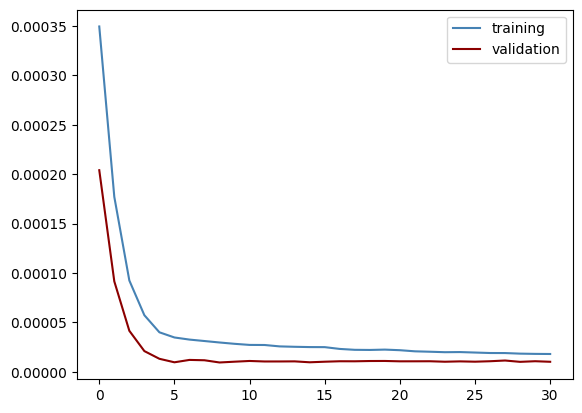

In [ ]:
plt.plot(fit.history['loss'], label = 'training', color = 'SteelBlue')
plt.plot(fit.history['val_loss'], label = 'validation', color = 'DarkRed')
plt.legend()
plt.show

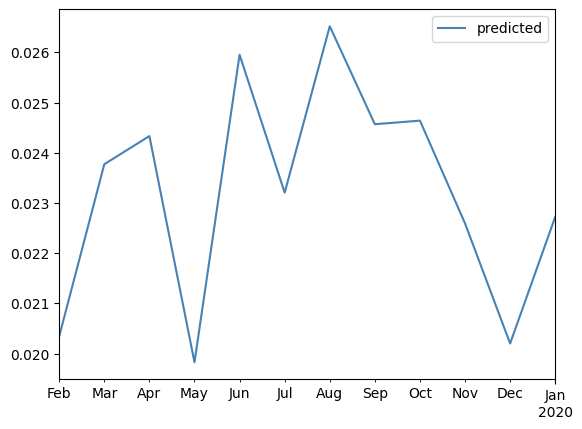

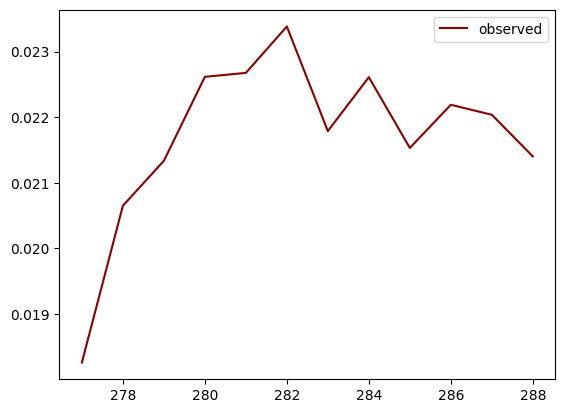

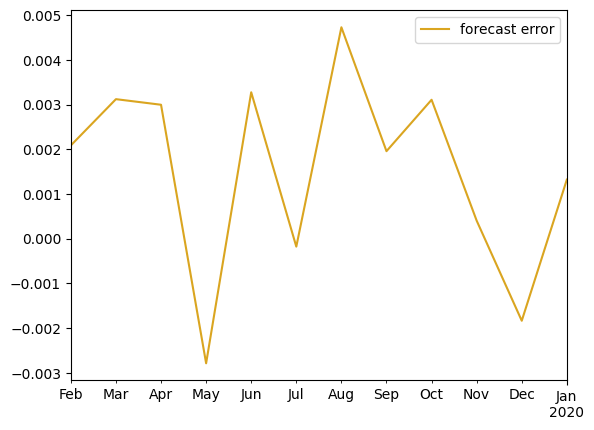

In [ ]:
predicted = pd.DataFrame(yhat.T, index=pd.date_range('02/01/2019',periods=12,freq='M'))
predicted.columns = ['predicted']

predicted.plot(color = 'SteelBlue')
plt.show()

start_date = '2018-02-01'
end_date = '2019-01-01'
selected_columns = ['infUS']
observed =dataUS.loc[(dataUS['mdate'] >= start_date) & (dataUS['mdate'] <= end_date), selected_columns]

observed.columns = ['observed']

observed.plot(color = 'DarkRed')
plt.show()

model_error = array(predicted) - array(observed)
model_error = pd.DataFrame(model_error, index=pd.date_range('02/01/2019',periods=12,freq='M'))
model_error.columns = ['forecast error']

model_error.plot(color = 'goldenrod')
plt.show()

In [ ]:
model_error.mean()

forecast error    0.001517
dtype: float64

In [ ]:
n = 25
results = []

num_gpus = 1 # Set the number of GPUs you want to use

# Create a MirroredStrategy for multi-GPU training
strategy = tf.distribute.MirroredStrategy(devices=["/gpu:{}".format(i) for i in range(num_gpus)])

for i in range(0, n):
    with strategy.scope():
      model = Sequential()
      model.add(LSTM(100,
                  activation = 'tanh',
                  return_sequences = True,
                  input_shape = (n_steps_in, n_features)))
      model.add(LSTM(100,
                  dropout = 0.4,
                  recurrent_dropout = 0.4,
                activation = 'tanh'))
      model.add(Dense(50, activation = 'tanh'))
      model.add(Dense(25, activation = 'tanh'))
      model.add(Dense(n_steps_out))

      model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
                loss = 'mse')

    fit = model.fit(X,
          y,
          validation_data = (valX, valy),
          epochs = 500,
          verbose = 0,
          callbacks = [es])

    yhat = model.predict(x_input, verbose = 0)
    results.append((yhat))

In [ ]:
iter_output = pd.DataFrame(np.concatenate(results))
iter_output.columns = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']
iter_output

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,0.021774,0.021475,0.026969,0.023464,0.022228,0.019608,0.023384,0.025331,0.021890,0.025282,0.017159,0.021286
1,0.021936,0.026414,0.022752,0.024626,0.026421,0.023625,0.025353,0.021613,0.024238,0.025430,0.025410,0.027087
2,0.021796,0.021596,0.022091,0.023674,0.023828,0.024249,0.026750,0.021438,0.025619,0.024975,0.023326,0.020408
3,0.021643,0.017169,0.026238,0.023765,0.024423,0.024785,0.025334,0.023711,0.024708,0.021735,0.021515,0.025315
4,0.023649,0.022634,0.023425,0.021904,0.022428,0.024826,0.026437,0.019531,0.024816,0.022057,0.025447,0.024705
5,0.024556,0.021597,0.024778,0.022009,0.021873,0.021133,0.026457,0.023969,0.025322,0.027527,0.025209,0.024791
6,0.021951,0.023385,0.021882,0.020534,0.026503,0.022538,0.020913,0.024035,0.020789,0.021109,0.018696,0.021092
7,0.021154,0.027478,0.022800,0.024304,0.028097,0.024303,0.023293,0.023827,0.024228,0.024593,0.021299,0.018820
8,0.024289,0.025029,0.019336,0.025875,0.021916,0.019465,0.021067,0.022148,0.020102,0.023260,0.021973,0.024327
9,0.021724,0.024242,0.019322,0.023209,0.021225,0.018246,0.020841,0.022874,0.025322,0.024860,0.027038,0.019501


In [ ]:
mean_forecast = pd.DataFrame([iter_output['m1'].mean(),
                iter_output['m2'].mean(),
                iter_output['m3'].mean(),
                iter_output['m4'].mean(),
                iter_output['m5'].mean(),
                iter_output['m6'].mean(),
                iter_output['m7'].mean(),
                iter_output['m8'].mean(),
                iter_output['m9'].mean(),
                iter_output['m10'].mean(),
                iter_output['m11'].mean(),
                iter_output['m12'].mean()], index=pd.date_range('02/01/2019',periods=12,freq='M')) #mean dataframe
mean_forecast.columns = ['predicted']
mean_forecast

,predicted
2019-02-28,0.021963
2019-03-31,0.022685
2019-04-30,0.022608
2019-05-31,0.023225
2019-06-30,0.023759
2019-07-31,0.022984
2019-08-31,0.023027
2019-09-30,0.022473
2019-10-31,0.023894
2019-11-30,0.023464


In [ ]:
se_forecast = pd.DataFrame([iter_output['m1'].std(),
                iter_output['m2'].std(),
                iter_output['m3'].std(),
                iter_output['m4'].std(),
                iter_output['m5'].std(),
                iter_output['m6'].std(),
                iter_output['m7'].std(),
                iter_output['m8'].std(),
                iter_output['m9'].std(),
                iter_output['m10'].std(),
                iter_output['m11'].std(),
                iter_output['m12'].std()], index=pd.date_range('02/01/2019',periods=12,freq='M')) #se daaframe
se_forecast.columns = ['predicted']
se_forecast

,predicted
2019-02-28,0.002393
2019-03-31,0.002120
2019-04-30,0.002274
2019-05-31,0.001785
2019-06-30,0.002208
2019-07-31,0.002418
2019-08-31,0.002145
2019-09-30,0.002443
2019-10-31,0.002380
2019-11-30,0.002309


In [ ]:
upper_bound = mean_forecast + 2*se_forecast
lower_bound = mean_forecast - 2*se_forecast

<function matplotlib.pyplot.show(close=None, block=None)>

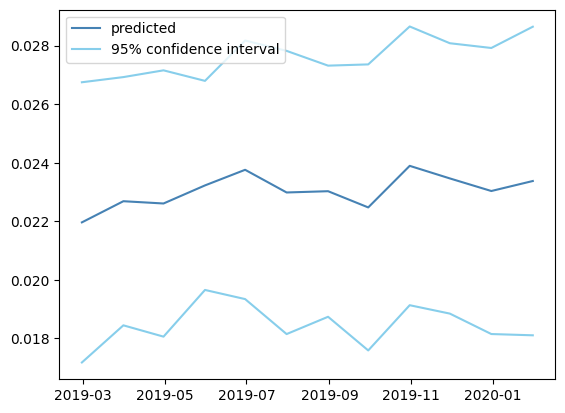

In [ ]:
plt.plot(mean_forecast, label = 'predicted', color = 'SteelBlue')
plt.plot(upper_bound, label = '95% confidence interval', color = 'SkyBlue')
plt.plot(lower_bound, color = 'SkyBlue')
plt.legend()
plt.show

In [ ]:
# Assuming you already have a DataFrame named 'data' containing the data

# Select the desired column
observed = dataUS.iloc[289:, 1:2]  # Assuming the desired column is at index 2

# Assign column name
observed.columns = ['observed']

# Set the index as a date range
observed.index = pd.date_range('02/01/2019', periods=12, freq='M')
observed


,observed
2019-02-28,0.020848
2019-03-31,0.020471
2019-04-30,0.020851
2019-05-31,0.020003
2019-06-30,0.021377
2019-07-31,0.022043
2019-08-31,0.023696
2019-09-30,0.023495
2019-10-31,0.023143
2019-11-30,0.023173


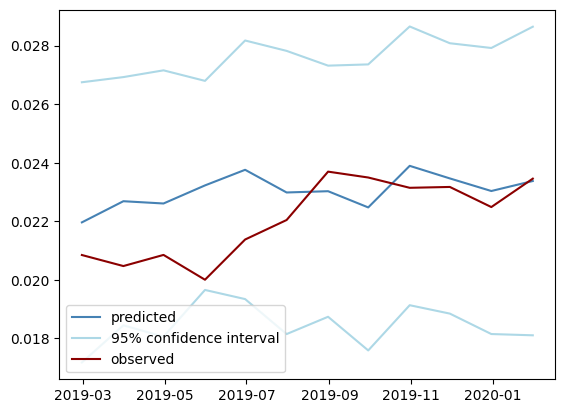

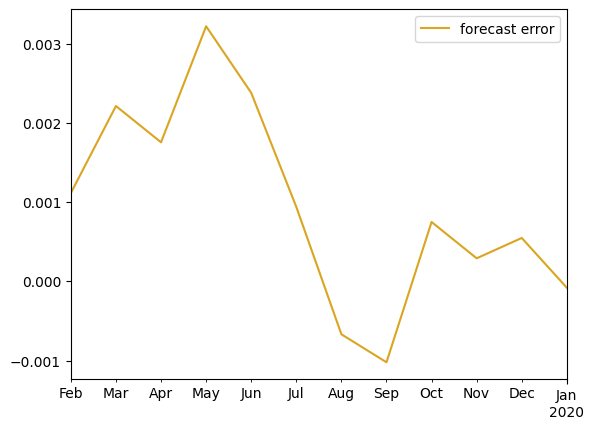

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(forecast error    0.000954
 dtype: float64,
 predicted    0.023041
 dtype: float32)

In [ ]:
import numpy as np

plt.plot(mean_forecast, label='predicted', color='SteelBlue')
plt.plot(upper_bound, label='95% confidence interval', color='lightblue')
plt.plot(lower_bound, color='lightblue')
plt.plot(observed, label='observed', color='DarkRed')  # Specify the column 'infUS' for observed data
plt.legend()
plt.show()

model_error = np.array(mean_forecast) - np.array(observed)  # Subtract 'infUS' column from observed data
model_error = pd.DataFrame(model_error, index=pd.date_range('02/01/2019', periods=len(model_error), freq='M'))
model_error.columns = ['forecast error']

model_error.plot(color='goldenrod')
plt.show()

model_error.mean(), np.mean(mean_forecast)  # Use np.mean to calculate mean of mean_forecast array

